In [1]:
import numpy as np 
import pandas as pd 
import unicodedata
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [6]:
from collections import Counter
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import model_selection

In [7]:
!pip install lightgbm

In [8]:
import lightgbm as lgb

In [18]:
!pip install xgboost

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 425, in _error_catcher
    yield
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Lenovo\anaconda3\lib\http\client.py", line 454, in read
    n = self.readinto(b)
  File "C:\Users\Lenovo\anaconda3\lib\http\client.py", line 498, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Lenovo\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Lenovo\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Lenovo\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buf

In [12]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [23]:
pip install catboost


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=e25b41d64d4b47f54e5cdaa9fff45c428785a83aa217bc06e78bea6fc749efc1
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [24]:
from catboost import Pool, CatBoostRegressor

In [25]:
import gc
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
train_df = pd.read_excel("C:/Users/Lenovo/Desktop/Final Participant Data Folder/Final_Train.xlsx")

In [29]:
test_df = pd.read_excel("C:/Users/Lenovo/Desktop/Final Participant Data Folder/Final_Test.xlsx")

In [30]:
df_test = test_df.copy()

In [31]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [32]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [33]:
train_df.shape, test_df.shape

((5961, 7), (1987, 6))

In [34]:
ctype = train_df.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,object,6


In [35]:
ctype = test_df.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,object,6


In [36]:
# Train set
dat_train = train_df.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the Train dataset is {}\n".format(dat_train.max()))
print("And the qualifications is --> {}\n\n".format(train_df.Qualification[dat_train.idxmax()]))
print("Minimum qualification of a doctor in the Train dataset is {}\n".format(dat_train.min()))
print("And the qualifications is --> {}\n\n".format(train_df.Qualification[dat_train.idxmin()]))


Maximum qualifications of a doctor in the Train dataset is 10

And the qualifications is --> Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


Minimum qualification of a doctor in the Train dataset is 1

And the qualifications is --> BAMS




In [37]:
# Test set
dat_test = test_df.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the Test dataset is {}\n".format(dat_test.max()))
print("And the qualifications is --> {}\n\n".format(test_df.Qualification[dat_test.idxmax()]))
print("Minimum qualification of a doctor in the Test dataset is {}\n".format(dat_test.min()))
print("And the qualifications is --> {}".format(test_df.Qualification[dat_test.idxmin()]))

Maximum qualifications of a doctor in the Test dataset is 17

And the qualifications is --> BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)


Minimum qualification of a doctor in the Test dataset is 1

And the qualifications is --> MBBS


In [38]:
sorted(test_df.Qualification[test_df.Qualification.apply(lambda x: len(x.split(','))).idxmax()].split(","))

[' Advanced Endotontic Course On Root Canal',
 ' Advanced Retreatment Course in RCT',
 ' Certificate in Cosmetic Dentistry',
 ' Certification in Prosthodontics & Periodontology',
 ' Certified Advanced Course in Wisdom Tooth Extraction',
 ' Certified Course in Oral Surgery',
 ' Diploma in Cosmetic Dentistry',
 ' Endodontics and Aesthetic Dentistry',
 ' Fellow of Academy of General Education (FAGE)',
 ' Fellowship In Clinical Cosmetology',
 ' Fellowship in Aesthetic Dentistry (FAD)',
 ' MBA - Hospital Management',
 ' MIDA',
 ' PG Diploma In Clinical Cosmetology (PGDCC)',
 ' PG Diploma in Conservative',
 ' Post Graduate Certificate in Endodontics (PGCE)',
 'BDS']

In [41]:
def sortQual(text):
    arr = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"), text) # to replace ','
    return ','.join(sorted(arr.lower().replace(" ","").split(",")))

In [42]:
# Train Set
train_df.Qualification = train_df.Qualification.apply(lambda x: sortQual(x))


In [43]:
# Test Set
test_df.Qualification = test_df.Qualification.apply(lambda x: sortQual(x))

In [44]:
def doc(series):
    text = ''
    for i in series:
        text += i + ','
    return text

In [45]:
text = doc(train_df.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Qualification','Count']
df.head(10)

,Qualification,Count
0,mbbs,2808
1,bds,1363
2,bams,764
3,bhms,749
4,md-dermatology,606
5,ms-ent,411
6,venereology&leprosy,297
7,md-generalmedicine,285
8,diplomainotorhinolaryngology(dlo),250
9,md-homeopathy,181


In [46]:
text = doc(test_df.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Qualification','Count']
df.head(10)

,Qualification,Count
0,mbbs,980
1,bds,428
2,bhms,249
3,bams,243
4,md-dermatology,196
5,ms-ent,128
6,md-generalmedicine,99
7,venereology&leprosy,91
8,diplomainotorhinolaryngology(dlo),85
9,ddvl,67


In [47]:
text = doc(test_df.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Qualification','Count']
df['code'] = df.Qualification.astype('category').cat.codes
df.head(10)

,Qualification,Count,code
0,mbbs,980,268
1,bds,428,14
2,bhms,249,16
3,bams,243,12
4,md-dermatology,196,286
5,ms-ent,128,354
6,md-generalmedicine,99,290
7,venereology&leprosy,91,425
8,diplomainotorhinolaryngology(dlo),85,112
9,ddvl,67,68


In [48]:
qual_dict = dict(zip(df.Qualification, df.code))

In [49]:
def qual_col(dataframe, col, col_num):
    return dataframe[col].str.split(',').str[col_num]

In [50]:
# for training set
for i in range(0,dat_train.max()):
    qual = "Qual_"+ str(i+1)
    train_df[qual] = qual_col(train_df,'Qualification', i)


In [51]:
# for test set
for i in range(0,dat_test.max()):
    qual = "Qual_"+ str(i+1)
    test_df[qual] = qual_col(test_df,'Qualification', i)

In [52]:
# Select Qualification categorical columns to be encoded

column_test = ['Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
           'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10', 'Qual_11',
           'Qual_12', 'Qual_13', 'Qual_14', 'Qual_15', 'Qual_16', 'Qual_17']

column_train = ['Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
           'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10']

In [53]:
for i in column_train:
    train_df.replace({i: qual_dict}, inplace=True)
    
    
for i in column_test:
    test_df.replace({i: qual_dict}, inplace=True)

In [54]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,268,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qual_1,Qual_2,Qual_3,Qual_4,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,mbbs,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,268,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,112,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",68,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,14,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
train_df['Qual_count'] = train_df.Qualification.apply(lambda x: len(x.split(',')))
test_df['Qual_count'] = test_df.Qualification.apply(lambda x: len(x.split(',')))

In [57]:
# Train set
train_df['years_exp'] = train_df['Experience'].str.slice(stop=2).astype(int)


In [58]:
# Test set
test_df['years_exp'] = test_df['Experience'].str.slice(stop=2).astype(int)

In [59]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count,years_exp
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,24
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,268,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20


In [60]:
# Train set
train_df['Rating'].fillna('0%',inplace = True)
train_df['Rating'] = train_df['Rating'].str.slice(stop=-1).astype(int)

In [61]:
# Test set
test_df['Rating'].fillna('0%',inplace = True)
test_df['Rating'] = test_df['Rating'].str.slice(stop=-1).astype(int)


In [62]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count,years_exp
0,"bhms,md-homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,24
1,"bams,md-ayurvedamedicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12
2,"mbbs,ms-otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,268,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9
3,"bams,bsc-zoology",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12
4,bams,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20


In [63]:
train_df.Place = train_df.Place.apply(lambda x: ','.join(str(x).lower().replace(" ","").split(",")))
test_df.Place = train_df.Place.apply(lambda x: ','.join(str(x).lower().replace(" ","").split(",")))

In [64]:
# Train Set
train_df['City'] = train_df['Place'].apply(lambda x: str(x).replace(' ','').split(',')[-1])
train_df['Locality'] = train_df['Place'].apply(lambda x: str(x).rsplit(',', 1)[0])


In [65]:
# Test Set
test_df['City'] = test_df['Place'].apply(lambda x: str(x).replace(' ','').split(',')[-1])
test_df['Locality'] = test_df['Place'].apply(lambda x: str(x).rsplit(',', 1)[0])

In [66]:
test_df.City.value_counts()

delhi                 406
bangalore             403
mumbai                401
hyderabad             319
chennai               290
coimbatore             78
ernakulam              52
thiruvananthapuram     30
nan                     8
Name: City, dtype: int64

In [67]:
train_df.City.value_counts()

bangalore             1258
mumbai                1219
delhi                 1185
hyderabad              951
chennai                855
coimbatore             228
ernakulam              153
thiruvananthapuram      86
nan                     25
e                        1
Name: City, dtype: int64

In [68]:
train_df[train_df.City == 'e']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count,years_exp,City,Locality
3980,bds,23 years experience,0,e,Dentist,NaN,250,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,23,e,e


In [69]:
train_df.loc[3980, 'Place'] = np.nan
train_df.loc[3980, 'City'] = np.nan
train_df.loc[3980, 'Locality'] = np.nan

In [70]:
def get_dummies(dataframe,feature_name):
  dummy = pd.get_dummies(dataframe[feature_name], prefix=feature_name)
  dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
  return pd.concat([dataframe,dummy], axis = 1)

In [71]:
train_df = get_dummies(train_df, 'City')
test_df = get_dummies(test_df, 'City')


In [72]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,City,Locality,City_chennai,City_coimbatore,City_delhi,City_ernakulam,City_hyderabad,City_mumbai,City_nan,City_thiruvananthapuram
0,"bhms,md-homeopathy",24 years experience,100,"kakkanad,ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,291,NaN,...,ernakulam,kakkanad,0,0,0,1,0,0,0,0
1,"bams,md-ayurvedamedicine",12 years experience,98,"whitefield,bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,280,NaN,...,bangalore,whitefield,0,0,0,0,0,0,0,0
2,"mbbs,ms-otorhinolaryngology",9 years experience,0,"mathikere-bel,bangalore",ENT Specialist,NaN,300,268,359,NaN,...,bangalore,mathikere-bel,0,0,0,0,0,0,0,0
3,"bams,bsc-zoology",12 years experience,0,"bannerghattaroad,bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,21,NaN,...,bangalore,bannerghattaroad,0,0,0,0,0,0,0,0
4,bams,20 years experience,100,"keelkattalai,chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,12,NaN,NaN,...,chennai,keelkattalai,1,0,0,0,0,0,0,0


In [73]:
train_df.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [74]:
train_df.Profile = train_df.Profile.apply(lambda x: str(x).lower().replace(" ",""))
test_df.Profile = train_df.Profile.apply(lambda x: str(x).lower().replace(" ",""))

In [75]:
train_df = get_dummies(train_df, 'Profile')
test_df = get_dummies(test_df, 'Profile')

In [76]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,City_ernakulam,City_hyderabad,City_mumbai,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath
0,"bhms,md-homeopathy",24 years experience,100,"kakkanad,ernakulam",homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,291,NaN,...,1,0,0,0,0,0,0,0,0,1
1,"bams,md-ayurvedamedicine",12 years experience,98,"whitefield,bangalore",ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,280,NaN,...,0,0,0,0,0,0,0,0,0,0
2,"mbbs,ms-otorhinolaryngology",9 years experience,0,"mathikere-bel,bangalore",entspecialist,NaN,300,268,359,NaN,...,0,0,0,0,0,0,0,1,0,0
3,"bams,bsc-zoology",12 years experience,0,"bannerghattaroad,bangalore",ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,21,NaN,...,0,0,0,0,0,0,0,0,0,0
4,bams,20 years experience,100,"keelkattalai,chennai",ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,12,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# List of top 10 Localities along with there occurence in Train Set
train_df['Locality'] = train_df['Locality'].apply(str) # Convert int64 dtype to str type first
text = doc(train_df.Locality)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Locality','Count']
df.head(10)

,Locality,Count
0,hsrlayout,75
1,andheriwest,70
2,dwarka,68
3,banjarahills,64
4,mulundwest,54
5,borivaliwest,52
6,kandivaliwest,50
7,indiranagar,48
8,whitefield,47
9,malleswaram,47


In [78]:
# List of top 10 unique Localities along with there occurence in Test Set
test_df['Locality'] = test_df['Locality'].apply(str) # Convert int64 dtype to str type first
text = doc(test_df.Locality)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Locality','Count']
df.head(10)

,Locality,Count
0,andheriwest,25
1,borivaliwest,23
2,dwarka,23
3,malleswaram,21
4,hsrlayout,20
5,ghatkopareast,20
6,whitefield,19
7,indiranagar,19
8,kandivaliwest,18
9,adyar,16


In [79]:
def encode(data):
    return data.astype('category').cat.codes

In [80]:
columns = ['Locality']

for i in columns:
    col = i+"_code"
    test_df[col] = encode(test_df[i])

In [81]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qual_1,Qual_2,Qual_3,Qual_4,...,City_hyderabad,City_mumbai,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code
0,mbbs,35 years experience,0,"kakkanad,ernakulam",homeopath,NaN,268,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,207
1,"diplomainotorhinolaryngology(dlo),mbbs",31 years experience,0,"whitefield,bangalore",ayurveda,NaN,112,268.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,587
2,"ddvl,mbbs",40 years experience,70,"mathikere-bel,bangalore",entspecialist,"70% 4 Feedback KK Nagar, Chennai",68,268.0,NaN,NaN,...,0,0,0,0,0,0,1,0,0,308
3,bams,0 years experience,0,"bannerghattaroad,bangalore",ayurveda,NaN,12,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,50
4,"bds,mds-conservativedentistry&endodontics",16 years experience,100,"keelkattalai,chennai",ayurveda,General Dentistry Conservative Dentistry Cosme...,14,315.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,234


In [82]:
df_test_merge = test_df[['Locality','Locality_code']].drop_duplicates()

In [83]:
train_df = pd.merge(train_df,df_test_merge[['Locality','Locality_code']],on='Locality', how='left')

In [84]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,City_hyderabad,City_mumbai,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code
0,"bhms,md-homeopathy",24 years experience,100,"kakkanad,ernakulam",homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,291,NaN,...,0,0,0,0,0,0,0,0,1,207.0
1,"bams,md-ayurvedamedicine",12 years experience,98,"whitefield,bangalore",ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,280,NaN,...,0,0,0,0,0,0,0,0,0,587.0
2,"mbbs,ms-otorhinolaryngology",9 years experience,0,"mathikere-bel,bangalore",entspecialist,NaN,300,268,359,NaN,...,0,0,0,0,0,0,1,0,0,308.0
3,"bams,bsc-zoology",12 years experience,0,"bannerghattaroad,bangalore",ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,21,NaN,...,0,0,0,0,0,0,0,0,0,50.0
4,bams,20 years experience,100,"keelkattalai,chennai",ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,12,NaN,NaN,...,0,0,0,0,0,0,0,0,0,234.0


In [85]:
list(train_df.Miscellaneous_Info[0:10])

['100% 16 Feedback Kakkanad, Ernakulam',
 '98% 76 Feedback Whitefield, Bangalore',
 nan,
 'Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb',
 '100% 4 Feedback Keelkattalai, Chennai',
 nan,
 nan,
 'Dental Fillings Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction',
 nan,
 nan]

In [86]:
train_df.Miscellaneous_Info = train_df.Miscellaneous_Info.str.replace(",","")
test_df.Miscellaneous_Info = test_df.Miscellaneous_Info.str.replace(",","")

In [87]:
# Train set
train_df.Miscellaneous_Info = train_df.Miscellaneous_Info.str.replace(unicodedata.lookup('Indian Rupee Sign'), 'INR ')

In [88]:
# Test set
test_df.Miscellaneous_Info = test_df.Miscellaneous_Info.str.replace(unicodedata.lookup('Indian Rupee Sign'), 'INR ')


In [89]:
list(train_df.Miscellaneous_Info[0:10])

['100% 16 Feedback Kakkanad Ernakulam',
 '98% 76 Feedback Whitefield Bangalore',
 nan,
 'Bannerghatta Road Bangalore INR 250 Available on Sun 10 Feb',
 '100% 4 Feedback Keelkattalai Chennai',
 nan,
 nan,
 'Dental Fillings Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction',
 nan,
 nan]

In [90]:
def find_feedback(data):
    result = re.search(r' (.*?) Feedback',data)
    if result:
        return int(result.group(1))
    else:
        return 0

In [91]:
# Train set
train_df['feedack_num'] = train_df.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)

In [92]:
# Test set
test_df['feedack_num'] = test_df.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)

In [93]:
train_df.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,City_mumbai,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code,feedack_num
0,"bhms,md-homeopathy",24 years experience,100,"kakkanad,ernakulam",homeopath,100% 16 Feedback Kakkanad Ernakulam,100,16,291,NaN,...,0,0,0,0,0,0,0,1,207.0,16
1,"bams,md-ayurvedamedicine",12 years experience,98,"whitefield,bangalore",ayurveda,98% 76 Feedback Whitefield Bangalore,350,12,280,NaN,...,0,0,0,0,0,0,0,0,587.0,76
2,"mbbs,ms-otorhinolaryngology",9 years experience,0,"mathikere-bel,bangalore",entspecialist,NaN,300,268,359,NaN,...,0,0,0,0,0,1,0,0,308.0,0
3,"bams,bsc-zoology",12 years experience,0,"bannerghattaroad,bangalore",ayurveda,Bannerghatta Road Bangalore INR 250 Available ...,250,12,21,NaN,...,0,0,0,0,0,0,0,0,50.0,0
4,bams,20 years experience,100,"keelkattalai,chennai",ayurveda,100% 4 Feedback Keelkattalai Chennai,250,12,NaN,NaN,...,0,0,0,0,0,0,0,0,234.0,4


In [94]:
# Let us have a look at the different Fee value in the records.

list(train_df.Miscellaneous_Info[train_df.Miscellaneous_Info.str.contains('INR', na = False)].sample(10))

['Somajiguda Hyderabad INR 350 Visits Today',
 'Kemps Corner Mumbai INR 200 Visits Today',
 'Pallikaranai Chennai INR 300 Available Today',
 'Manapakkam Chennai INR 600 Visits Today',
 '1 Feedback Chanda Nagar Hyderabad INR 300',
 'Royapettah Chennai INR 300 Visits Today',
 '8 Feedback Kothaguda Hyderabad INR 500',
 'Patparganj Delhi INR 700 Available on Fri 08 Feb',
 '5 Feedback Kalkaji Delhi INR 200',
 'Consultant Implantologist/ Period Anna Nagar Chennai INR 100']

In [95]:
def find_fees(data):
    result = re.search(r'INR (\d*)',data)
    if result:
        return int(result.group(1))
    else:
        return 0

In [96]:
# Train set
train_df['fees_val'] = train_df.Miscellaneous_Info.apply(lambda x: find_fees(x) if 'INR' in str(x) else 0)


In [97]:
# Test set
test_df['fees_val'] = test_df.Miscellaneous_Info.apply(lambda x: find_fees(x) if 'INR' in str(x) else 0)

In [98]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code,feedack_num,fees_val
0,"bhms,md-homeopathy",24 years experience,100,"kakkanad,ernakulam",homeopath,100% 16 Feedback Kakkanad Ernakulam,100,16,291,NaN,...,0,0,0,0,0,0,1,207.0,16,0
1,"bams,md-ayurvedamedicine",12 years experience,98,"whitefield,bangalore",ayurveda,98% 76 Feedback Whitefield Bangalore,350,12,280,NaN,...,0,0,0,0,0,0,0,587.0,76,0
2,"mbbs,ms-otorhinolaryngology",9 years experience,0,"mathikere-bel,bangalore",entspecialist,NaN,300,268,359,NaN,...,0,0,0,0,1,0,0,308.0,0,0
3,"bams,bsc-zoology",12 years experience,0,"bannerghattaroad,bangalore",ayurveda,Bannerghatta Road Bangalore INR 250 Available ...,250,12,21,NaN,...,0,0,0,0,0,0,0,50.0,0,250
4,bams,20 years experience,100,"keelkattalai,chennai",ayurveda,100% 4 Feedback Keelkattalai Chennai,250,12,NaN,NaN,...,0,0,0,0,0,0,0,234.0,4,0


In [99]:
train_df.Fees.value_counts().reset_index().sort_values(by='index')

,index,Fees
30,5,1
21,10,2
39,20,1
20,30,4
25,40,2
11,50,81
19,60,11
17,70,18
18,80,12
0,100,1306


In [100]:
train_df[train_df.Fees < 50]


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code,feedack_num,fees_val
1316,bams,4 years experience,0,"worli,mumbai",ayurveda,NaN,10,12,NaN,NaN,...,0,0,0,0,0,0,0,589.0,0,0
1930,bds,6 years experience,0,"tvmedicalcollege,thiruvananthapuram",dentist,NaN,5,14,NaN,NaN,...,0,1,1,0,0,0,0,538.0,0,0
2248,"bhms,certificateinchildhealth(cch),cgo",22 years experience,0,"kandivaliwest,mumbai",homeopath,NaN,40,16,34,58,...,0,0,0,0,0,0,1,221.0,0,0
2459,bams,37 years experience,0,"bandraeast,mumbai",ayurveda,NaN,40,12,NaN,NaN,...,0,0,0,0,0,0,0,46.0,0,0
2563,md-ayurvedamedicine,35 years experience,0,"marathahalli,bangalore",ayurveda,NaN,30,280,NaN,NaN,...,0,0,0,0,0,0,0,306.0,0,0
3303,bds,3 years experience,0,"perumbavoor,ernakulam",dentist,NaN,10,14,NaN,NaN,...,0,0,1,0,0,0,0,407.0,0,0
3499,bams,45 years experience,0,"bhandupwest,mumbai",ayurveda,NaN,30,12,NaN,NaN,...,0,0,0,0,0,0,0,61.0,0,0
4290,bams,15 years experience,0,"secunderabad,hyderabad",ayurveda,NaN,30,12,NaN,NaN,...,0,0,0,0,0,0,0,473.0,0,0
4748,"mbbs,md-generalmedicine",44 years experience,0,"secunderabad,hyderabad",generalmedicine,NaN,20,268,290,NaN,...,0,0,0,0,0,1,0,473.0,0,0
5703,bams,9 years experience,0,"goregaoneast,mumbai",ayurveda,NaN,30,12,NaN,NaN,...,0,0,0,0,0,0,0,146.0,0,0


In [101]:
train_df.years_exp.describe()

count    5961.000000
mean       17.303976
std        11.142798
min         0.000000
25%         9.000000
50%        14.000000
75%        23.000000
max        66.000000
Name: years_exp, dtype: float64

In [102]:
test_df.years_exp.describe()

count    1987.000000
mean       17.874685
std        11.366764
min         0.000000
25%         9.000000
50%        15.000000
75%        24.000000
max        65.000000
Name: years_exp, dtype: float64

In [103]:
train_df[train_df.years_exp == 0]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual_1,Qual_2,Qual_3,...,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code,feedack_num,fees_val
91,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,nan,dermatologists,NaN,100,241,NaN,NaN,...,1,0,0,1,0,0,0,350.0,0,0
168,bams,0 years experience,0,"bhandupwest,mumbai",ayurveda,NaN,100,12,NaN,NaN,...,0,0,0,0,0,0,0,61.0,0,0
380,"diplomainotorhinolaryngology(dlo),mbbs,ms-ent",0 years experience,0,"marinelines,mumbai",entspecialist,NaN,100,112,268,354,...,0,0,0,0,1,0,0,307.0,0,0
383,bds,0 years experience,0,"chromepet,chennai",dentist,Dental Fillings Dental Crowns General Dentistry,100,14,NaN,NaN,...,0,0,1,0,0,0,0,96.0,0,0
409,bds,0 years experience,0,"ganapathy,coimbatore",dentist,NaN,100,14,NaN,NaN,...,0,0,1,0,0,0,0,139.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,bhms,0 years experience,0,"kaggadasapura,bangalore",homeopath,Skin Allergy Treatment Chronic Skin Allergy Wr...,250,16,NaN,NaN,...,0,0,0,0,0,0,1,205.0,0,0
5551,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,nan,dermatologists,NaN,100,241,NaN,NaN,...,1,0,0,1,0,0,0,350.0,0,0
5723,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,nan,dermatologists,NaN,100,241,NaN,NaN,...,1,0,0,1,0,0,0,350.0,0,0
5821,"mbbs,md-internalmedicine",0 years experience,0,"crpark,delhi",generalmedicine,NaN,500,268,293,NaN,...,0,0,0,0,0,1,0,103.0,0,0


In [104]:
test_df[test_df.Qualification.str.contains('getinspiredbyremarkablestoriesofpeoplelikeyou')]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qual_1,Qual_2,Qual_3,Qual_4,...,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code,feedack_num,fees_val
381,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,"omrroad,chennai",ayurveda,NaN,241,NaN,NaN,NaN,...,0,0,0,0,0,0,0,373,0,0
1494,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,"jpnagar3phase,bangalore",ayurveda,NaN,241,NaN,NaN,NaN,...,0,0,0,0,0,0,0,197,0,0
1644,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,"tuglakabad,delhi",generalmedicine,NaN,241,NaN,NaN,NaN,...,0,0,0,0,0,1,0,536,0,0
1838,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,"malviyanagar,delhi",generalmedicine,NaN,241,NaN,NaN,NaN,...,0,0,0,0,0,1,0,299,0,0
1925,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,"hal2ndstage,bangalore",generalmedicine,NaN,241,NaN,NaN,NaN,...,0,0,0,0,0,1,0,160,0,0
1930,getinspiredbyremarkablestoriesofpeoplelikeyou,0 years experience,0,"tvmedicalcollege,thiruvananthapuram",dentist,NaN,241,NaN,NaN,NaN,...,0,1,1,0,0,0,0,538,0,0


In [105]:
train_df.fees_val.describe()

count    5961.000000
mean       15.932729
std       111.222172
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2500.000000
Name: fees_val, dtype: float64

In [106]:
train_df.fees_val.value_counts()

0       5768
200       33
500       27
250       24
300       23
600       15
100       14
1000      13
800       10
400        7
1200       6
700        5
350        4
1500       3
1750       2
2000       1
2500       1
150        1
450        1
750        1
1350       1
475        1
Name: fees_val, dtype: int64

In [107]:
train_df.loc[train_df.fees_val > 999, ['Miscellaneous_Info',"Fees"]]

,Miscellaneous_Info,Fees
672,Mahim Mumbai INR 1200 Available Today,100
770,4 Feedback Mahim Mumbai INR 1200,100
996,Andheri East Mumbai INR 1000 Visits Today,100
1038,Prabhadevi Mumbai INR 1000 Visits On-Call,100
1039,Saket Delhi INR 1350 Available Tomorrow,100
1077,1 Feedback Chembur Mumbai INR 1200,100
1141,3 Feedback Parel Mumbai INR 1750,100
1601,Vileparle West Mumbai INR 1200INR 150020% OFF*...,100
1683,Andheri West Mumbai INR 1200 Available Today,100
2007,1 Feedback Shalimar Bagh Delhi INR 1000,100


In [108]:
test_df.loc[test_df.fees_val > 999, ['Miscellaneous_Info']]

,Miscellaneous_Info
43,Patparganj Delhi INR 1000 Available Today
103,Saket Delhi INR 1500 Available Today
193,3 Feedback Greater Kailash Part 2 Delhi INR 3500
206,Prabhadevi Mumbai INR 1500 Visits On-Call
443,Panchsheel Park Delhi INR 1200 Available Tomorrow
493,Mahim Mumbai INR 1000 Visits Today
494,3 Feedback Andheri West Mumbai INR 1200
636,Pusa Road Delhi INR 1200 Available Tomorrow
661,Panchsheel Park Delhi INR 1000 Available Tomorrow
662,Prabhadevi Mumbai INR 1500 Visits Tomorrow


In [109]:
def mark_100(data):
    data.Fees = np.where(data.Qualification.str.contains('getinspiredbyremarkablestoriesofpeoplelikeyou', na = False),
                      100,
                      data.Fees)
    return data

In [110]:
cols_to_use = ['Rating', 'Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
       'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10',
       'Qual_count', 'years_exp', 'City_chennai', 'City_coimbatore', 'City_delhi', 'City_ernakulam', 'City_hyderabad',
       'City_mumbai', 'City_nan', 'City_thiruvananthapuram', 'Profile_dentist', 'Profile_dermatologists', 'Profile_entspecialist', 
       'Profile_generalmedicine', 'Profile_homeopath', 'Locality_code', 'feedack_num', 'fees_val']

target_col = 'Fees'

In [111]:
train = train_df[cols_to_use].copy()
# train['Fees'] = train_df.Fees.copy()
test = test_df[cols_to_use].copy()

In [112]:
train.head()

,Rating,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,...,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code,feedack_num,fees_val
0,100,16,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,207.0,16,0
1,98,12,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,587.0,76,0
2,0,268,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,308.0,0,0
3,0,12,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,50.0,0,250
4,100,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,234.0,4,0


In [113]:
test.head()

,Rating,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,...,City_nan,City_thiruvananthapuram,Profile_dentist,Profile_dermatologists,Profile_entspecialist,Profile_generalmedicine,Profile_homeopath,Locality_code,feedack_num,fees_val
0,0,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,207,0,0
1,0,112,268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,587,0,0
2,70,68,268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,308,4,0
3,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,50,0,0
4,100,14,315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,234,0,0


In [115]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataframe has 29 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Qual_10,5960,100.0
Qual_9,5957,99.9
Qual_8,5956,99.9
Qual_7,5949,99.8
Qual_6,5928,99.4
Qual_5,5845,98.1
Qual_4,5589,93.8
Qual_3,4591,77.0
Qual_2,1962,32.9
Locality_code,448,7.5


In [116]:
for i in cols_to_use:
    train[i] = pd.to_numeric(train[i].astype(str), errors='coerce').fillna(-1).astype(int)
    test[i] = pd.to_numeric(test[i].astype(str), errors='coerce').fillna(-1).astype(int)

In [117]:
# Define Train and test set
train_X = train.copy()
test_X = test.copy()
train_y = train_df.Fees.copy()

train_X.shape, train_y.shape, test_X.shape

((5961, 29), (5961,), (1987, 29))

In [118]:
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=4)

In [119]:
def train_model(X=train_X,
                X_test=test_X,
                y=train_y,
                params=None,
                folds=folds,
                model_type='lgb',
                plot_feature_importance=False,
                averaging='usual',
                make_oof=False,
                num_class=0
               ):
    result_dict = {}
    
    if make_oof:
        if num_class:
            oof = np.zeros((len(X), num_class))
        else:
            oof = np.zeros((len(X)))
            
    if num_class:
        prediction = np.zeros((len(X_test), num_class))
    else:
        prediction = np.zeros((len(X_test)))
    
    scores = []
    feature_importance = pd.DataFrame()
    
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        gc.collect()
        print("")
        print('Fold', fold_n + 1, 'started at', time.ctime())
        
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        if model_type == 'lgb':
            train_data = lgb.Dataset(X_train, label=y_train,
#                                      categorical_feature = cat_cols
                                    )
            valid_data = lgb.Dataset(X_valid, label=y_valid,
#                                      categorical_feature = cat_cols
                                    )
            model = lgb.train(
                params,
                train_data,
                num_boost_round = 1000,
                valid_sets = [valid_data],
                verbose_eval = 100,
                early_stopping_rounds = 100
            )

            del train_data, valid_data
            
            y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration)
            
            del X_valid
            gc.collect()            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            model = xgb.train(
                params = params,
                dtrain = train_data,
                num_boost_round = 1500,
                evals=[(valid_data, "Validation")],
                early_stopping_rounds = 100,
                verbose_eval = 100,
                )
            
            del train_data, valid_data
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)
            
            del X_valid
            gc.collect()
        if model_type == 'cat':
            train_pool = Pool(X_train, y_train) 
            valid_pool = Pool(X_valid, y_valid)
            
            model =  CatBoostRegressor(iterations=5000,
                                        learning_rate=0.01,
                                        eval_metric='RMSE',
                                        random_seed = 4,
                                        metric_period = 200,
                                      )
            
            model.fit(train_pool,
                      eval_set=(valid_pool),
#                       cat_features=cat_cols,
                      use_best_model=True
                     )
            del train_pool, valid_pool
                    
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test).reshape(-1,)
            
            del X_valid
            gc.collect()            

        if make_oof:
            oof[valid_index] = y_pred_valid
                   
#         scores.append(kappa(y_valid, y_pred_valid.argmax(1)))        
#         print('Fold kappa:', kappa(y_valid, y_pred_valid.argmax(1)))
#         print('')
        
        if averaging == 'usual':
            prediction += y_pred
        elif averaging == 'rank':
            prediction += pd.Series(y_pred).rank().values
        # feature importance
        if model_type == 'lgb' or model_type == 'xgb' or model_type == 'cat':
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            if model_type == 'lgb':
                fold_importance["importance"] = model.feature_importance()
            elif model_type == 'xgb':
                fold_importance["importance"] = fold_importance.feature.map(model.get_score()).fillna(0)
            else:
                fold_importance["importance"] = model.feature_importances_            
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    result_dict['prediction'] = prediction
    #     print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if plot_feature_importance:
        plt.figure(figsize=(15, 15));
        feature_importance = pd.DataFrame(feature_importance.groupby("feature")["importance"].mean().sort_values(ascending=False).reset_index())[:50]
        sns.barplot(x="importance", y="feature", data=feature_importance);
        plt.title('Feature Importance (avg over folds)');

        result_dict['feature_importance'] = feature_importance
            
    if make_oof:
        result_dict['oof'] = oof
    
    return result_dict

In [120]:
lgb_params = {'metric': 'rmse',"objective" : "regression",'min_data_in_leaf': 149, 'max_depth': 9,"boosting": "gbdt","lambda_l1": 0.2634,"random_state": 133,"num_leaves" : 30,"min_child_samples" : 100,"learning_rate" : 0.1,"bagging_fraction" : 0.7,"feature_fraction" : 0.5,"bagging_frequency" : 5,"bagging_seed" : 4,"verbosity" : -1}


Fold 1 started at Sun Dec  6 11:03:28 2020
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=149, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=149
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 175.155
Early stopping, best iteration is:
[42]	valid_0's rmse: 174.76

Fold 2 started at Sun Dec  6 11:03:28 2020
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=149, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=149
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 168.053
[200]	valid_0's rmse: 167.881
Early stopping, best iteration is:
[162]	valid_0's rmse: 167.496

Fold 3 started at Sun Dec  6 11:03:28 2020
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=149, min_child_samples=100 will be ignored. Current value

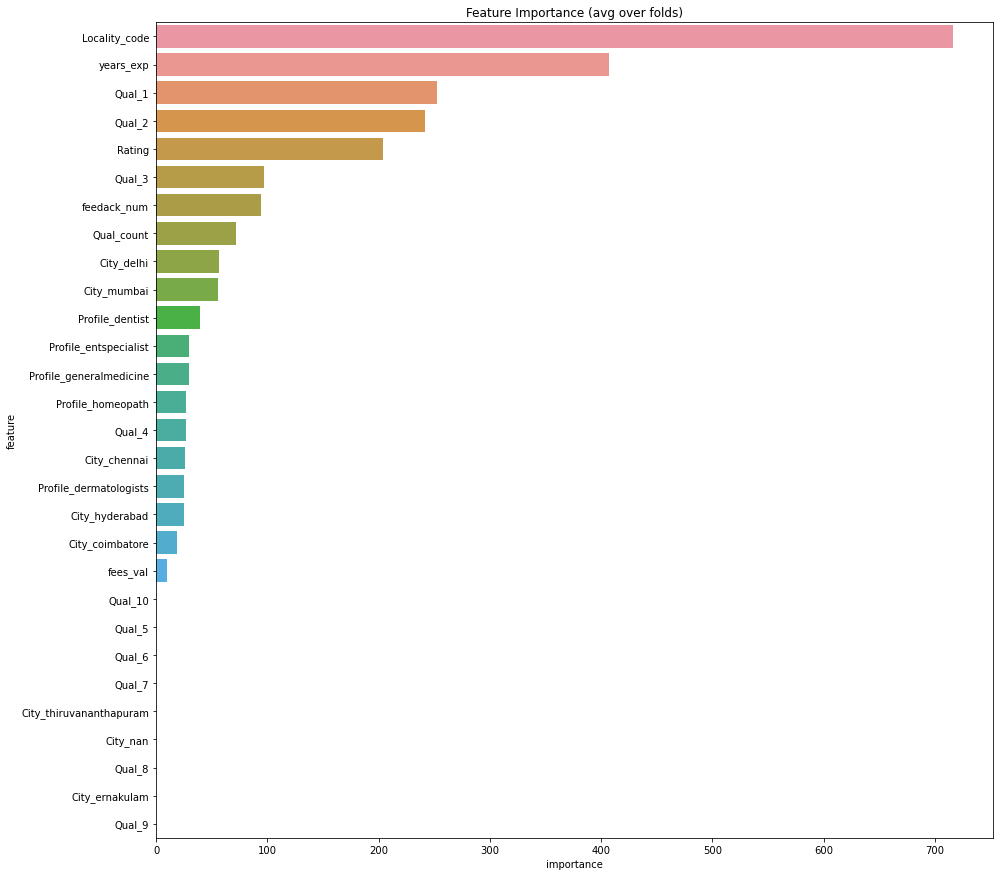

In [121]:
result_dict_lgb = train_model(X=train_X,X_test=test_X,y=train_y,params=lgb_params,model_type='lgb',plot_feature_importance=True,make_oof=True,num_class=0                           )

In [122]:
test_lgb = test_df[['Qualification', 'Experience', 'Rating', 'Place', 'Profile','Miscellaneous_Info']].copy()
test_lgb['Fees'] = result_dict_lgb['prediction']

In [123]:
xgb_params = {
    "learning_rate" : 0.01,
    "n_estimators" : 3400,
    "max_depth" : 7,
    "min_child_weight" : 0,
    "gamma": 0,
    "subsample" : 0.7,
    "colsample_bytree" : 0.7,
    "objective" : 'reg:linear',
    "nthread" : -1,
    "scale_pos_weight" : 1,
    "seed" : 4,
    "reg_alpha" : 0.00006
}

In [127]:
# Create CAT prediction

test_cat = test_df[['Qualification', 'Experience', 'Rating', 'Place', 'Profile','Miscellaneous_Info']].copy()
test_cat['Fees'] = result_dict_cat['prediction']

In [128]:
# Create X and Y dataset

Y = train_y.copy()
X = train[cols_to_use]


In [135]:
test_lgb = mark_100(test_lgb.copy())
test_cat = mark_100(test_cat.copy())


In [138]:
test_lgb.to_csv('submission_lgb.csv', index=False)
test_cat.to_csv('submission_cat.csv', index=False)

In [140]:
from sklearn.svm import SVC
import joblib
import sklearn
svc = sklearn.svm.SVC()

In [142]:
joblib.dump(svc, 'Doctors Consultation Fee.pkl')

['Doctors Consultation Fee.pkl']